In [1]:
from src.utils import *

Generate problem instance

In [2]:
# choose MDP and piE parameters
S,A,H = 3,2,8
rho = 5e-2
markov = False
det = False

np.random.seed(0)

# generate MDP and piE
mdp = MDP(S,A,H,rho)
piE = get_piE(S,A,H,markov,det)

Generate expert's dataset

In [3]:
# choose number of trajectories
N = 300

np.random.seed(0)

# sample expert's dataset
DE = mdp.play(piE,N)

Run algorithms

In [4]:
# choose parameter theta
theta = 5e-2

# run algorithms
piRSBC = RS_BC(DE,mdp,theta)
piRSKT = RS_KT(DE,mdp,theta)
piBC = BC(DE,mdp)
piMIMIC = MIMIC_MD(DE,mdp)

"Compute" return distributions

In [5]:
# choose M and eps for evaluation
M = 50000
eps = 5e-1

# estimate expert's return distribution
etaE = mdp.est_ret(mdp.play(piE,M),eps)

# estimate expert's return distribution from DE
eta_hat = mdp.est_ret(DE,eps)

# estimate return distributions
etaRSBC = mdp.est_ret(mdp.play(piRSBC,M),eps)
etaRSKT = mdp.est_ret(mdp.play(piRSKT,M),eps)
etaBC = mdp.est_ret(mdp.play(piBC,M),eps)
etaMIMIC = mdp.est_ret(mdp.play(piMIMIC,M),eps)

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
C:\Users\IO\AppData\Local\Temp\ipykernel_7480\3386715123.py:5: SyntaxWarning: invalid escape sequence '\e'
  ['$\eta^E$', '$\eta^{\\text{RS-BC}}$', '$\eta^{\\text{RS-KT}}$',
C:\Users\IO\AppData\Local\Temp\ipykernel_7480\3386715123.py:5: SyntaxWarning: invalid escape sequence '\e'
  ['$\eta^E$', '$\eta^{\\text{RS-BC}}$', '$\eta^{\\text{RS-KT}}$',
C:\Users\IO\AppData\Local\Temp\ipykernel_7480\3386715123.py:5: SyntaxWarning: invalid escape sequence '\e'
  ['$\eta^E$', '$\eta^{\\text{RS-BC}}$', '$\e

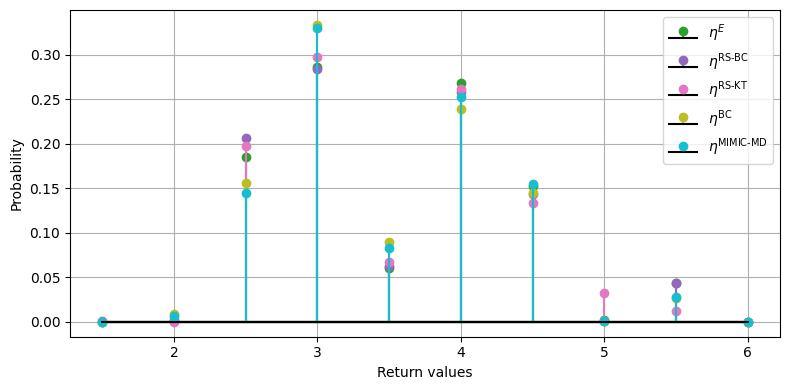

In [12]:
# plot
x, y = 3, 13
plot_return_distributions(
    [etaE[x:y],etaRSBC[x:y],etaRSKT[x:y],etaBC[x:y],etaMIMIC[x:y]],
    ['$\eta^E$', '$\eta^{\\text{RS-BC}}$', '$\eta^{\\text{RS-KT}}$',
     '$\eta^{\\text{BC}}$','$\eta^{\\text{MIMIC-MD}}$'],
     eps,x,y,cumsum=False,save_fig=True)

Plot return distributions

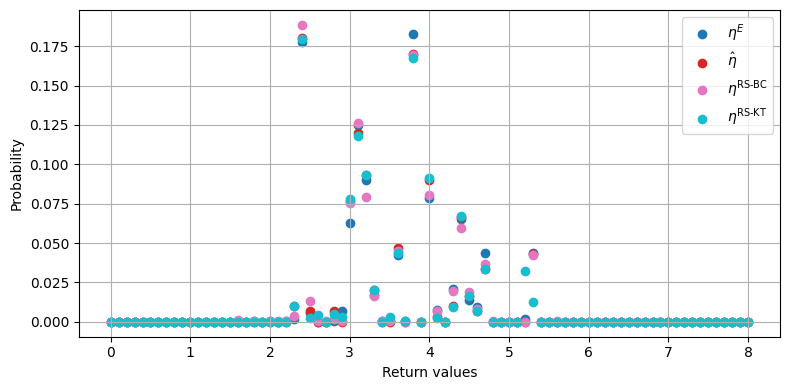

In [ ]:
# plot
plot_return_distributions(
    [etaE,eta_hat,etaRSBC,etaRSKT],
    ['$\eta^E$','$\hat{\eta}$', '$\eta^{\\text{RS-BC}}$', '$\eta^{\\text{RS-KT}}$'],
     eps)